Hierarchical Clustering - Silhouette score: 0.15675483450688257, Completeness score: 0.06865434106357196, Homogeneity score: 0.07293774010921956


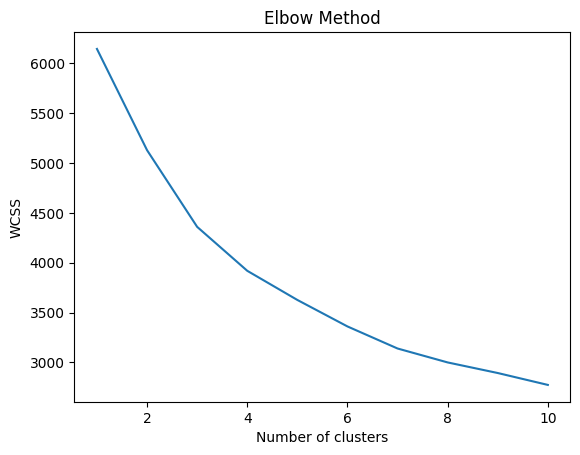

K-means Clustering - Silhouette score: 0.1956540901138544, Completeness score: 0.062075901378193375, Homogeneity score: 0.0623819106364333


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score
from sklearn.preprocessing import StandardScaler

# Load the Pima Indian Diabetes dataset into a Pandas dataframe
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

# Preprocess the dataset
X = df.iloc[:, :-1]
X = StandardScaler().fit_transform(X)

# Perform hierarchical clustering
h_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
h_labels = h_cluster.fit_predict(X)
h_silhouette = silhouette_score(X, h_labels)
h_completeness = completeness_score(df['class'], h_labels)
h_homogeneity = homogeneity_score(df['class'], h_labels)

print(f"Hierarchical Clustering - Silhouette score: {h_silhouette}, Completeness score: {h_completeness}, Homogeneity score: {h_homogeneity}")

# Perform K-means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k_cluster = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
k_labels = k_cluster.fit_predict(X)
k_silhouette = silhouette_score(X, k_labels)
k_completeness = completeness_score(df['class'], k_labels)
k_homogeneity = homogeneity_score(df['class'], k_labels)

print(f"K-means Clustering - Silhouette score: {k_silhouette}, Completeness score: {k_completeness}, Homogeneity score: {k_homogeneity}")
